<a href="https://colab.research.google.com/github/Islom-Radjapov/Auto_price_prediction/blob/main/Auto_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import librarys***

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

***Import data***

In [174]:
data = pd.read_csv("/content/sample_data/auto_costs.csv")
data

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


***Data validation and cleaning***


In [175]:
data.drop('ID',axis=1,inplace=True) # delete id column from data
data.drop('symboling',axis=1,inplace=True) # delete id column from data


In [176]:
# check for unique values from the data
def print_volue_unique(data):
  def prin_value(col_name):     
    x = data[col_name].unique()
    return(x)
  for i in data:
    print(i)
    print(prin_value(i), "\n")
print_volue_unique(data)

name
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel i

In [177]:
# clearing the car name
data["name"] = data["name"].astype("string")
data["name"] = data["name"].str.split(' ',expand=True)[0]
data.name.replace(to_replace="vokswagen|vw|volkswagen", value="volkswagen",regex=True, inplace=True)
data['name'] = data['name'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota'})
data["name"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

***Convert our data to numbers because machine learning is efficient***

In [178]:
# here, only the data in the form of string is transferred to the number
encode_data = pd.DataFrame() 
encode_data_name = {}
label = preprocessing.LabelEncoder()
list_encode_name = pd.DataFrame()
for x in  data.columns:
    if( data[x].dtype == 'object'):
        encode_data[x] = label.fit_transform( data[x] )
        keys = label.classes_
        values = label.transform(label.classes_)
        dictionary = dict(zip(keys, values))
        encode_data_name[x] = dictionary 
    else:
      encode_data[x] = data[x]
# encode_data
encode_data_name





# here, only the data in the form of string is transferred to the number

# encode_data = pd.DataFrame() 
# encode_data_name = {}
# label = preprocessing.LabelEncoder()
# list_encode_name = pd.DataFrame()
# for x in  data.columns:
#     if( data[x].dtype == 'object'):
#         encode_data[x] = label.fit_transform( data[x] )
#         keys = label.classes_
#         values = label.transform(label.classes_)
#         dictionary = dict(zip(keys, values))
#         encode_data_name[x] = dictionary 
#     else:
#       encode_data[x] = data[x]

# encode_data

{'name': {'alfa-romero': 0,
  'audi': 1,
  'bmw': 2,
  'buick': 3,
  'chevrolet': 4,
  'dodge': 5,
  'honda': 6,
  'isuzu': 7,
  'jaguar': 8,
  'mazda': 9,
  'mercury': 10,
  'mitsubishi': 11,
  'nissan': 12,
  'peugeot': 13,
  'plymouth': 14,
  'porsche': 15,
  'renault': 16,
  'saab': 17,
  'subaru': 18,
  'toyota': 19,
  'volkswagen': 20,
  'volvo': 21},
 'fueltypes': {'diesel': 0, 'gas': 1},
 'aspiration': {'std': 0, 'turbo': 1},
 'doornumbers': {'four': 0, 'two': 1},
 'carbody': {'convertible': 0,
  'hardtop': 1,
  'hatchback': 2,
  'sedan': 3,
  'wagon': 4},
 'drivewheels': {'4wd': 0, 'fwd': 1, 'rwd': 2},
 'enginelocation': {'front': 0, 'rear': 1},
 'enginetype': {'dohc': 0,
  'dohcv': 1,
  'l': 2,
  'ohc': 3,
  'ohcf': 4,
  'ohcv': 5,
  'rotor': 6},
 'cylindernumber': {'eight': 0,
  'five': 1,
  'four': 2,
  'six': 3,
  'three': 4,
  'twelve': 5,
  'two': 6},
 'fuelsystem': {'1bbl': 0,
  '2bbl': 1,
  '4bbl': 2,
  'idi': 3,
  'mfi': 4,
  'mpfi': 5,
  'spdi': 6,
  'spfi': 7}}

***Data correlation view***

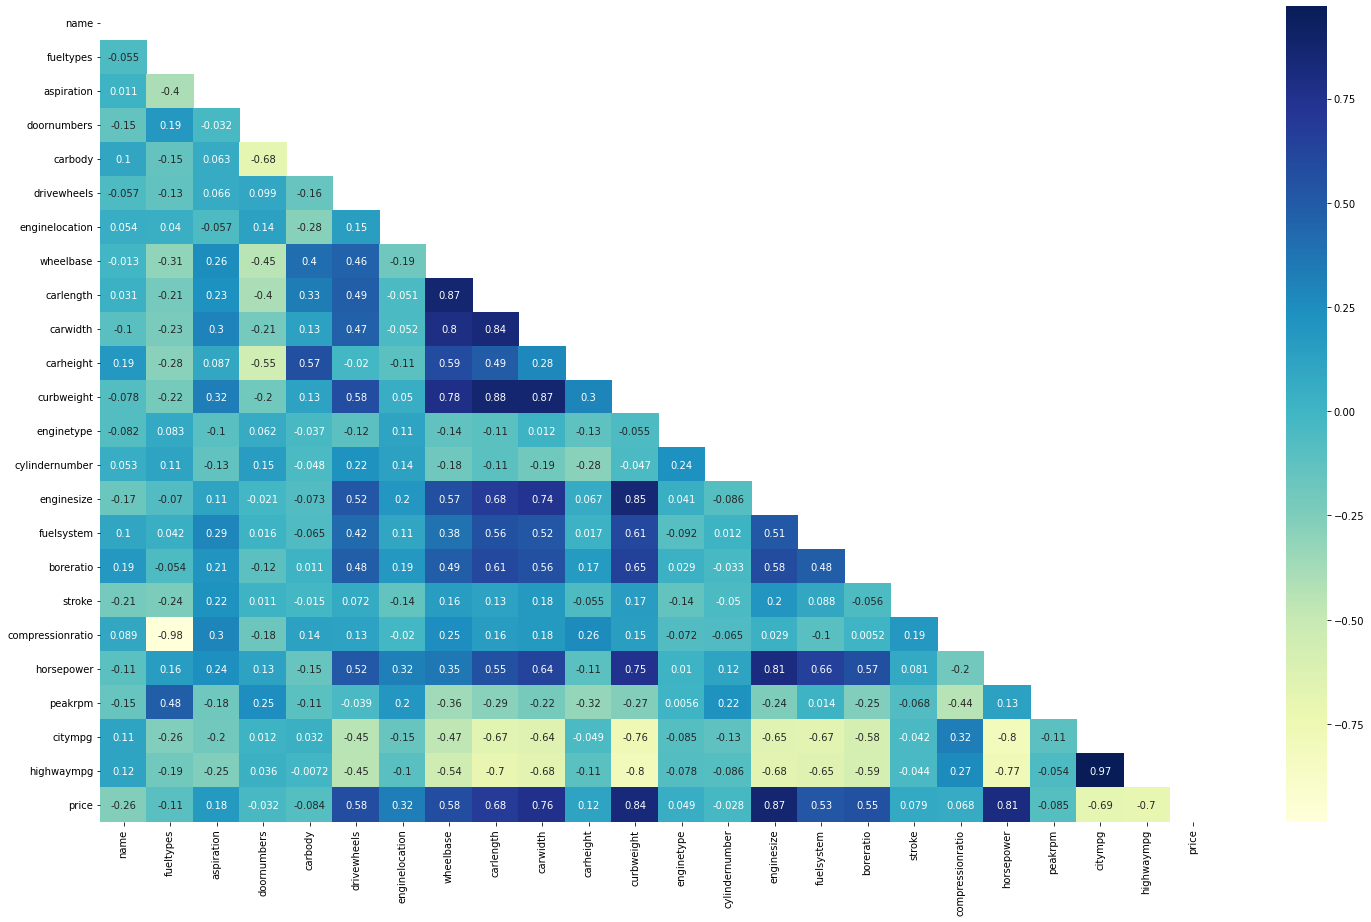

In [179]:
# data correlation visualization
matrix = np.triu(encode_data.corr())
plt.figure(figsize = (25, 15))
sns.heatmap(encode_data.corr(), annot = True, cmap="YlGnBu", mask = matrix)
plt.show()

In [180]:
# list of price dependence of data
price_corr = encode_data[data.columns].corr()['price'][:-1]
price_corr = price_corr.sort_values(ascending=False)
price_corr

enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
drivewheels         0.577992
wheelbase           0.577816
boreratio           0.553173
fuelsystem          0.526823
enginelocation      0.324973
aspiration          0.177926
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
cylindernumber     -0.027628
doornumbers        -0.031835
carbody            -0.083976
peakrpm            -0.085267
fueltypes          -0.105679
name               -0.262234
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

***Prediction section***

In [203]:
# data distribution get
# x = encode_data["enginesize curbweight horsepower carwidth carlength drivewheels wheelbase boreratio fuelsystem enginelocation aspiration carheight stroke compressionratio enginetype".split()]

x = encode_data.drop( 'price', axis=1)[:164]
y = data.price[:164]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=5)

***1 Madel LinearRegression***

In [204]:
madel_1 = LinearRegression().fit(x_train, y_train) # practice the model

***2 Madel LGBMRegressor***

In [205]:
madel_2 = LGBMRegressor().fit(x_train, y_train) # practice the model

***3 Madel XGBRegressor***

In [206]:
madel_3 = XGBRegressor().fit(x_train, y_train) # practice the model

[14:05:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


***4 Madel CatBoostRegressor***

In [ ]:
madel_4 = CatBoostRegressor().fit(x_train, y_train) # practice the model

***5 Madel KernelRidge***

In [208]:
madel_5 = KernelRidge().fit(x_train, y_train) # practice the model

***6 Madel ElasticNet***

In [209]:
madel_6 = ElasticNet().fit(x_train, y_train) # practice the model

***7 Madel BayesianRidge***

In [210]:
madel_7 = BayesianRidge().fit(x_train, y_train) # practice the model

***8 Madel GradientBoostingRegressor***

In [211]:
madel_8 = GradientBoostingRegressor().fit(x_train, y_train) # practice the model

***We test how well our models predict by using the rmse and r2 methods***

In [212]:
list_madels = [madel_1, madel_2, madel_3, madel_4, madel_5, madel_6, madel_7, madel_8]  # add the model to the list
rmse_test =[] # empty list for rmse
r2_test =[]   # empty list for r2

 # check each model and add the result to the empty lists
for madel in list_madels:
  predict = madel.predict(x_test)
  rmse_test.append( round( np.sqrt( mean_squared_error(y_test, predict) ), 2 ) )
  r2_test.append( round(r2_score(y_test, predict)*100 , 1 ) )
  
 # passing the result to a dataframe
madel_name = "LinearRegression LGBMRegressor XGBRegressor CatBoostRegressor KernelRidge ElasticNet BayesianRidge GradientBoostingRegressor".split()
result = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index = madel_name)
result

,RMSE,R2_Test
LinearRegression,2689.04,92.5
LGBMRegressor,2720.43,92.3
XGBRegressor,2174.84,95.1
CatBoostRegressor,2279.81,94.6
KernelRidge,2909.17,91.2
ElasticNet,3064.16,90.3
BayesianRidge,3383.34,88.1
GradientBoostingRegressor,1813.29,96.6


In [215]:
 # check each model and add the result to the empty lists
x1 = encode_data.drop( 'price', axis=1)[:164]
y1 = data.price[:164]
for madel in list_madels:
  predict = madel.predict(x1)
  rmse_test.append( round( np.sqrt( mean_squared_error(y1, predict) ), 2 ) )
  r2_test.append( round(r2_score(y1, predict)*100 , 1 ) )
  
 # passing the result to a dataframe
madel_name = "LinearRegression LGBMRegressor XGBRegressor CatBoostRegressor KernelRidge ElasticNet BayesianRidge GradientBoostingRegressor".split()
# result = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index = madel_name)
# result

In [216]:
def run_madel( name=None,	fueltypes=None,	aspiration=None,	doornumbers=None,	carbody=None,	drivewheels=None,	enginelocation=None,	wheelbase=None,	carlength=None,	carwidth=None,	carheight=None,	curbweight=None,	enginetype=None,	cylindernumber=None,	enginesize=None,	fuelsystem=None,	boreratio=None,	stroke=None,	compressionratio=None, horsepower=None,	peakrpm=None,	citympg=None,	highwaympg=None  ):
    name = encode_data_name["name"][name]
    fueltypes = encode_data_name["fueltypes"][fueltypes]
    aspiration = encode_data_name["aspiration"][aspiration]
    doornumbers = encode_data_name["doornumbers"][doornumbers]
    carbody = encode_data_name["carbody"][carbody]
    drivewheels = encode_data_name["drivewheels"][drivewheels]
    enginelocation = encode_data_name["enginelocation"][enginelocation]
    enginetype = encode_data_name["enginetype"][enginetype]
    cylindernumber = encode_data_name["cylindernumber"][cylindernumber]
    fuelsystem = encode_data_name["fuelsystem"][fuelsystem]
    col_name =   "name	   fueltypes	  aspiration	  doornumbers	   carbody	  drivewheels	   enginelocation	   wheelbase	 carlength	   carwidth	   carheight	  curbweight	  enginetype  	cylindernumber	  enginesize	  fuelsystem  	boreratio	   stroke	   compressionratio     horsepower  	peakrpm	  citympg	highwaympg".split()
    x = pd.DataFrame(  [[ name, fueltypes, aspiration, doornumbers, carbody, drivewheels, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio,  horsepower, peakrpm, citympg, highwaympg ]]   , columns = col_name  )
    predict = madel_8.predict(x)
    return predict


In [217]:
run_madel( name="alfa-romero",	fueltypes="gas",	aspiration="turbo",	doornumbers="four",	carbody="convertible",	drivewheels="rwd",	enginelocation="front",	wheelbase=88.6,	carlength=168.8	,	carwidth=64.1	,	carheight=130,	curbweight=2548,	enginetype="dohc",	cylindernumber="four",	enginesize=130,	fuelsystem="mpfi",	boreratio=3.47,	stroke=2.68,	compressionratio=9.0, horsepower=111,	peakrpm=5000,	citympg=21,	highwaympg=27 )

array([13233.60938757])

In [218]:
data

,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [220]:
# encode_data_name["enginetype"]["four"]